In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches
import seaborn as sns
from scipy import stats
import numpy as np
import math
import os
import folium
import warnings

warnings.filterwarnings("ignore")

In [76]:
base_dir = "C:/Users/natda/Desktop/NatDave/Academics/PhD_NU/RESEARCH/BlueBikes/"

# Load cleaned trip data with engineered features
feature_engineered_path = os.path.join(base_dir, "feature_engineered_trips.csv")
df = pd.read_csv(feature_engineered_path)

In [77]:
df['bike_type'].value_counts()

bike_type
traditional    3520157
electric       1134129
Name: count, dtype: int64

In [78]:
# Most/least popular stations
station_counts = df["start_station_name"].value_counts()
station_counts

start_station_name
MIT at Mass Ave / Amherst St             87860
Central Square at Mass Ave / Essex St    69325
Harvard Square at Mass Ave/ Dunster      60866
MIT Vassar St                            50054
MIT Pacific St at Purrington St          49354
                                         ...  
Community Life Center                      111
Hyde Park Ave at Arlington St               84
Broadway at Gerrish Ave                     76
Medford St at Warren St                     72
BCBS Hingham                                44
Name: count, Length: 524, dtype: int64

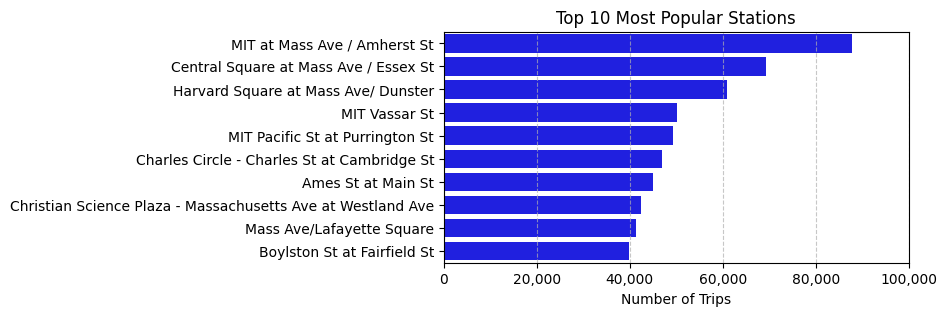

In [79]:
# Get the top 10 most popular stations
top_10_stations = station_counts.head(10)

# Create a horizontal bar plot for the top 10 most popular stations
plt.figure(figsize=(6, 3))
sns.barplot(
    x=top_10_stations.values,
    y=top_10_stations.index,
    color='blue'
)

plt.xticks(ticks=plt.xticks()[0], labels=[f'{int(x):,}' for x in plt.xticks()[0]], rotation=0)

plt.title('Top 10 Most Popular Stations')
plt.xlabel('Number of Trips')
plt.ylabel("")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

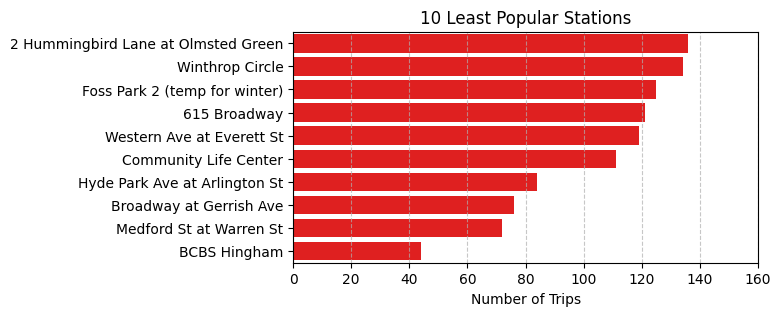

In [80]:
# Least popular stations

# Get the 10 least popular stations (excluding those with zero trips)
least_10_stations = station_counts.tail(10)

# Create a horizontal bar plot for the 10 least popular stations
plt.figure(figsize=(6, 3))
sns.barplot(
    x=least_10_stations.values,
    y=least_10_stations.index,
    color='red'  # Use a solid color instead of a gradient
)

plt.xticks(ticks=plt.xticks()[0], labels=[f'{int(x):,}' for x in plt.xticks()[0]], rotation=0)

plt.title('10 Least Popular Stations')
plt.xlabel('Number of Trips')
plt.ylabel("")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

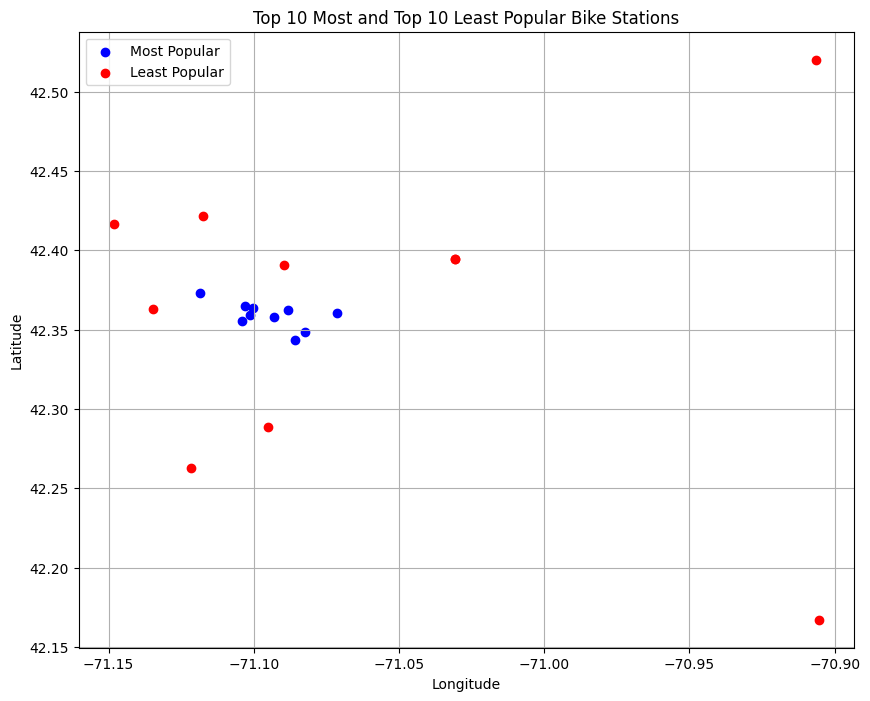

In [81]:
# Create a new figure and axis
plt.figure(figsize=(10, 8))

# Plot the top 10 most popular stations
for station in top_10_stations.index:
    station_data = df[df["start_station_name"] == station]
    plt.scatter(station_data['start_lng'].iloc[0], station_data['start_lat'].iloc[0],
                color='blue', label='Most Popular' if station == top_10_stations.index[0] else "", alpha=1.0)

# Plot the least 10 popular stations
for station in least_10_stations.index:
    station_data = df[df["start_station_name"] == station]
    plt.scatter(station_data['start_lng'].iloc[0], station_data['start_lat'].iloc[0],
                color='red', label='Least Popular' if station == least_10_stations.index[0] else "", alpha=1.0)

# Add labels and title
plt.title('Top 10 Most and Top 10 Least Popular Bike Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

# Show the plot
plt.grid()
plt.show()

In [82]:
# Create a map centered at the mean coordinates of the stations
m = folium.Map(location=[df['start_lat'].mean(), df['start_lng'].mean()], zoom_start=13)

# Add markers for the top 10 most popular stations
for station in top_10_stations.index:
    station_data = df[df["start_station_name"] == station]
    folium.Marker(
        location=[station_data['start_lat'].iloc[0], station_data['start_lng'].iloc[0]],
        popup=f'Most Popular: {station}',
        icon=folium.Icon(color='blue')
    ).add_to(m)

# Add markers for the 10 least popular stations
for station in least_10_stations.index:
    station_data = df[df["start_station_name"] == station]
    folium.Marker(
        location=[station_data['start_lat'].iloc[0], station_data['start_lng'].iloc[0]],
        popup=f'Least Popular: {station}',
        icon=folium.Icon(color='red')
    ).add_to(m)

# Display the map
m

In [83]:
# Top 10 most popular stations for electric and traditional bikes
for bike_type in ['electric', 'traditional']:
    top_10_stations = df[df['bike_type'] == bike_type].groupby('start_station_name').size().nlargest(10)

    # Add markers for the top 10 most popular stations of the bike type
    for station in top_10_stations.index:
        station_data = df[(df["start_station_name"] == station) & (df['bike_type'] == bike_type)]
        folium.Marker(
            location=[station_data['start_lat'].iloc[0], station_data['start_lng'].iloc[0]],
            popup=f'{bike_type.capitalize()} Top 10: {station}',
            icon=folium.Icon(color='red' if bike_type == 'electric' else 'blue')
        ).add_to(m)

    # Add markers for the 10 least popular stations of the bike type
    least_10_stations = df[df['bike_type'] == bike_type].groupby('start_station_name').size().nsmallest(10)
    for station in least_10_stations.index:
        station_data = df[(df["start_station_name"] == station) & (df['bike_type'] == bike_type)]
        folium.Marker(
            location=[station_data['start_lat'].iloc[0], station_data['start_lng'].iloc[0]],
            popup=f'{bike_type.capitalize()} Least 10: {station}',
            icon=folium.Icon(color='orange' if bike_type == 'electric' else 'green')
        ).add_to(m)

# Display the map
m

In [84]:
# Top 10 station pairs
top_10_station_pairs = (df.groupby(['start_station_name', 'end_station_name'])
                        .size()
                        .nlargest(10)
                        .reset_index(name='Count'))

top_10_station_pairs

,start_station_name,end_station_name,Count
0,MIT at Mass Ave / Amherst St,Beacon St at Massachusetts Ave,5148
1,MIT at Mass Ave / Amherst St,MIT Vassar St,5132
2,Beacon St at Massachusetts Ave,MIT at Mass Ave / Amherst St,4585
3,MIT Vassar St,MIT at Mass Ave / Amherst St,4558
4,MIT Vassar St,MIT Stata Center at Vassar St / Main St,4542
5,MIT at Mass Ave / Amherst St,Central Square at Mass Ave / Essex St,4339
6,MIT Vassar St,Ames St at Main St,4326
7,Central Square at Mass Ave / Essex St,MIT Pacific St at Purrington St,4279
8,MIT Stata Center at Vassar St / Main St,MIT Vassar St,3944
9,MIT Pacific St at Purrington St,MIT Stata Center at Vassar St / Main St,3812


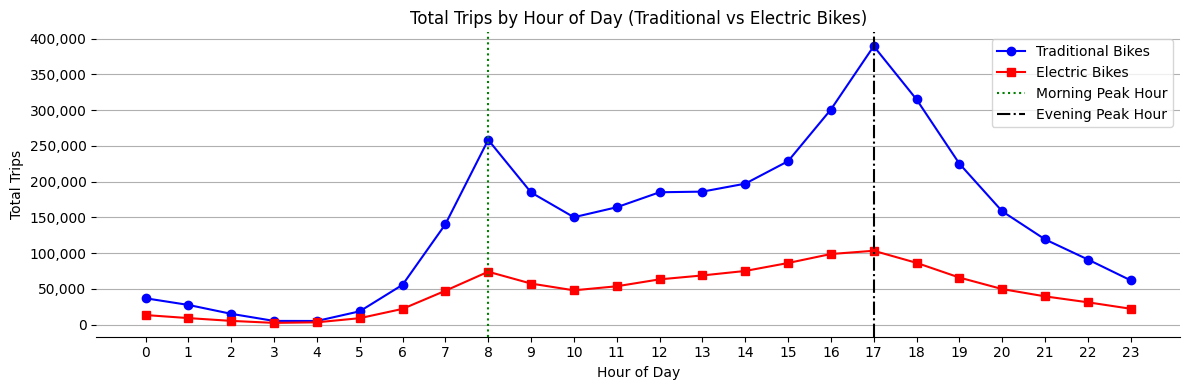

In [85]:
# Convert started_at and ended_at columns to datetime
df["started_at"] = pd.to_datetime(df["started_at"], errors='coerce')
df["ended_at"] = pd.to_datetime(df["ended_at"], errors='coerce')

# Filter data by bike type
traditionals = df[df["bike_type"] == "traditional"]
electrics = df[df["bike_type"] == "electric"]

# Extract hours for each bike type
traditionals["start_hour"] = traditionals["started_at"].dt.hour
electrics["start_hour"] = electrics["started_at"].dt.hour

# Group by hour of day and count trips for each bike type
traditional_hourly = traditionals.groupby("start_hour").size().reset_index(name="Total Start Trips")
electric_hourly = electrics.groupby("start_hour").size().reset_index(name="Total Start Trips")

# Plotting
plt.figure(figsize=(12, 4))
plt.plot(traditional_hourly["start_hour"], traditional_hourly["Total Start Trips"], marker='o', color="blue", label="Traditional Bikes")
plt.plot(electric_hourly["start_hour"], electric_hourly["Total Start Trips"], marker='s', color="red", label="Electric Bikes")

# Set x-axis ticks to show every hour
plt.xticks(range(24))

# Show morning and evening peak indicators
plt.axvline(x=8, color='green', linestyle=':', label='Morning Peak Hour')
plt.axvline(x=17, color='black', linestyle='dashdot', label='Evening Peak Hour')

# Add titles and labels
plt.title("Total Trips by Hour of Day (Traditional vs Electric Bikes)")
plt.xlabel("Hour of Day")
plt.ylabel("Total Trips")

# Customize grid, borders, yticks
plt.grid(axis='y')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# Add legend and display plot
plt.legend()
plt.tight_layout()
plt.show()

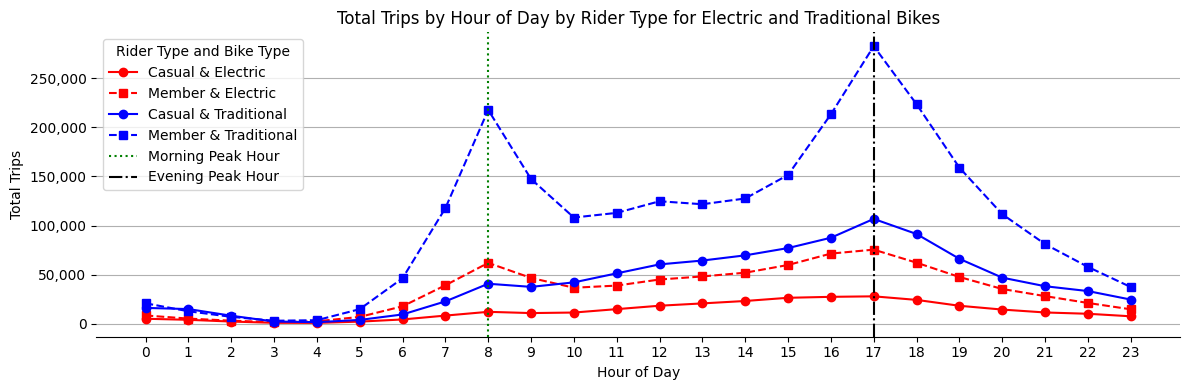

In [86]:
# Function to plot trips by hour of day, separated by bike type
def plot_daily_trips_by_hour_and_rider_type(df):
    # Group by Hour of Day, Rider Type, and Bike Type to calculate total trips
    hourly_trip_starts_by_rider_type = df.groupby(["hour_of_day", "rider_type", "bike_type"]).size().unstack(fill_value=0)

    # Plotting
    plt.figure(figsize=(12, 4))

    # Define colors for different bike types
    bike_type_colors = {
        "traditional": "blue",
        "electric": "red"
    }

    # Define line styles for casual and member rider types
    rider_type_line_styles = {
        "casual": "solid",
        "member": "dashed"
    }

    # Define markers for each rider type
    rider_type_markers = {
        "casual": "o",
        "member": "s"
    }

    # Plot separate lines for each bike type, with rider types in the legend
    for bike_type in hourly_trip_starts_by_rider_type.columns:
        for rider_type in hourly_trip_starts_by_rider_type.index.get_level_values(1).unique():
            # Filter data by bike type and rider type
            data = hourly_trip_starts_by_rider_type.loc[(slice(None), rider_type, slice(None)), bike_type].values

            # Get corresponding hours
            hours = hourly_trip_starts_by_rider_type.loc[(slice(None), rider_type, slice(None)), bike_type].index.get_level_values(0)

            # Plot with line style and marker
            plt.plot(
                hours,
                data,
                label=f"{rider_type.capitalize()} & {bike_type.title()}",
                color=bike_type_colors.get(bike_type),
                linestyle=rider_type_line_styles.get(rider_type, "solid"),
                marker=rider_type_markers.get(rider_type, "o")
            )

    # Set x-axis ticks to show every hour
    plt.xticks(range(24))

    # Format y-axis to display numbers with commas
    plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

    # Show morning and evening peak indicators
    plt.axvline(x=8, color='green', linestyle=':', label='Morning Peak Hour')
    plt.axvline(x=17, color='black', linestyle='dashdot', label='Evening Peak Hour')

    # Add titles and labels
    plt.title("Total Trips by Hour of Day by Rider Type for Electric and Traditional Bikes")
    plt.xlabel("Hour of Day")
    plt.ylabel("Total Trips")

    # Remove vertical grid lines
    plt.grid(axis='y')

    # Remove plot boundaries at right, left, and top
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)

    # Legend customization
    plt.legend(title="Rider Type and Bike Type")

    # Layout adjustments
    plt.tight_layout()
    plt.show()

# Apply the function for all bikes
plot_daily_trips_by_hour_and_rider_type(df)

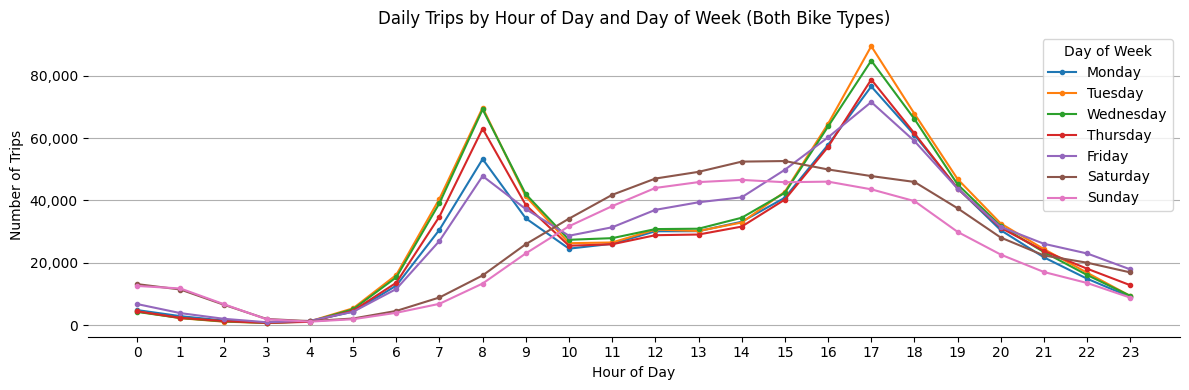

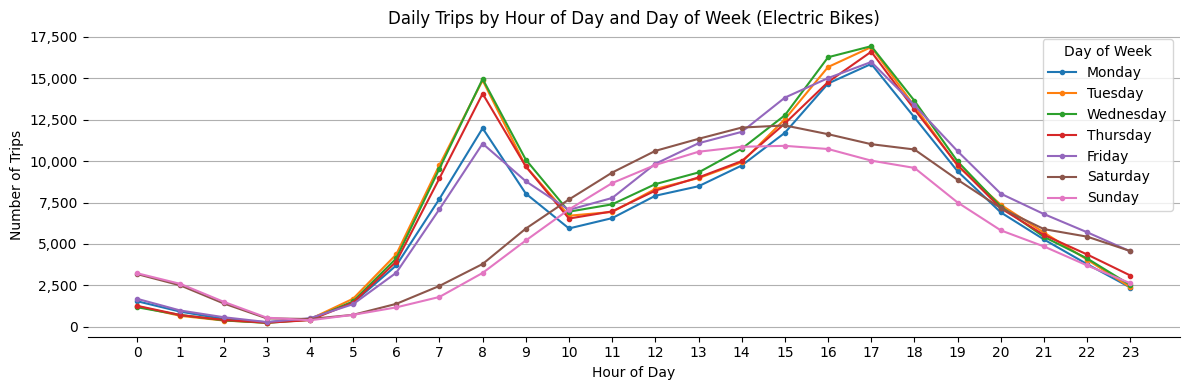

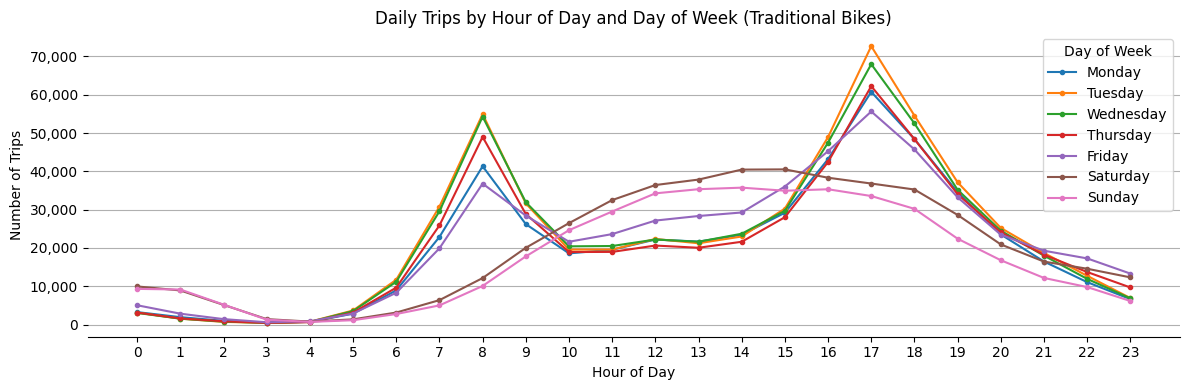

In [87]:
def plot_daily_trips_by_hour_and_day(df, bike_type=None):
    # Filter data by bike type if specified
    if bike_type:
        df = df[df["bike_type"] == bike_type]

    # Group by Day of the Week and Hour of Day to calculate total trips
    hourly_weekly_trip_starts = df.groupby(["day_of_week", "hour_of_day"]).size().unstack(fill_value=0)

    # Reorder the days of the week for proper visualization
    days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    hourly_weekly_trip_starts = hourly_weekly_trip_starts.reindex(days_order)

    # Plotting
    plt.figure(figsize=(12, 4))
    for day in hourly_weekly_trip_starts.index:
        plt.plot(hourly_weekly_trip_starts.columns, hourly_weekly_trip_starts.loc[day], marker='.', label=day)

    plt.xticks(range(24))
    plt.title(f"Daily Trips by Hour of Day and Day of Week ({bike_type.title() + ' Bikes' if bike_type else 'Both Bike Types'})")
    plt.xlabel("Hour of Day")
    plt.ylabel("Number of Trips")
    plt.grid(axis='y')

    # Format y-axis ticks to include commas
    plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f'{int(x):,}'))

    # Remove plot boundaries at right, left, and top
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)

    plt.legend(title="Day of Week")
    plt.tight_layout()
    plt.show()

# Apply the function for all bikes, electric bikes, and traditional bikes
plot_daily_trips_by_hour_and_day(df)
plot_daily_trips_by_hour_and_day(df, bike_type="electric")
plot_daily_trips_by_hour_and_day(df, bike_type="traditional")

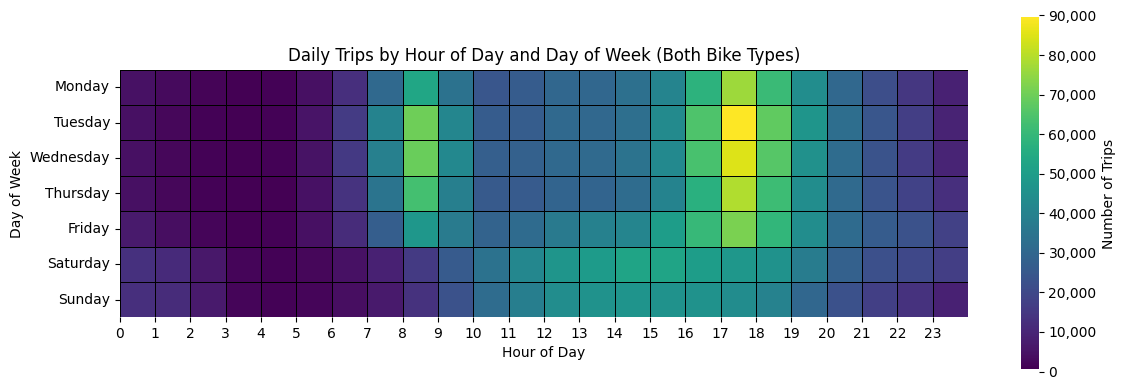

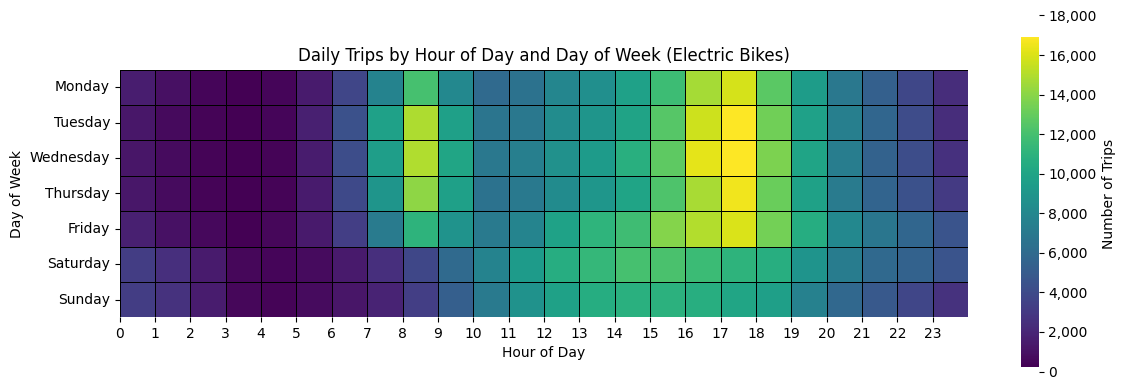

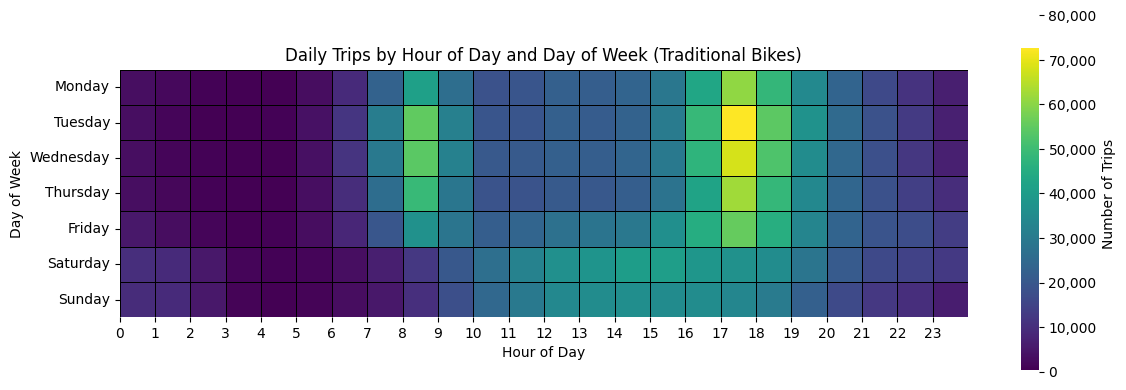

In [88]:
def plot_daily_trips_heatmap(df, bike_type=None):
    # Filter data by bike type if specified
    if bike_type:
        df = df[df["bike_type"] == bike_type]

    # Group by Day of the Week and Hour of Day to calculate total trips
    hourly_weekly_trip_starts = df.groupby(["day_of_week", "hour_of_day"]).size().unstack(fill_value=0)

    # Reorder the days of the week for proper visualization
    days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    hourly_weekly_trip_starts = hourly_weekly_trip_starts.reindex(days_order)

    # Plotting
    plt.figure(figsize=(12, 4))
    heatmap = sns.heatmap(hourly_weekly_trip_starts, cmap="viridis", annot=False, cbar_kws={'label': 'Number of Trips'}, linewidths=0.5, linecolor='black', square=True)

    # Customize the plot
    plt.title(f"Daily Trips by Hour of Day and Day of Week ({bike_type.title() + ' Bikes' if bike_type else 'Both Bike Types'})")
    plt.xlabel("Hour of Day")
    plt.ylabel("Day of Week")

    # Set the x-ticks to show every hour
    plt.xticks(ticks=range(24), labels=range(24))

    # Remove plot boundaries at right, left, and top
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)

    # Format color bar ticks with commas
    colorbar = heatmap.collections[0].colorbar
    colorbar.set_ticks(colorbar.get_ticks())
    colorbar.ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f'{x:,.0f}'))

    # Layout adjustments
    plt.tight_layout()
    plt.show()

# Apply the function for all bikes, electric bikes, and traditional bikes
plot_daily_trips_heatmap(df)
plot_daily_trips_heatmap(df, bike_type="electric")
plot_daily_trips_heatmap(df, bike_type="traditional")

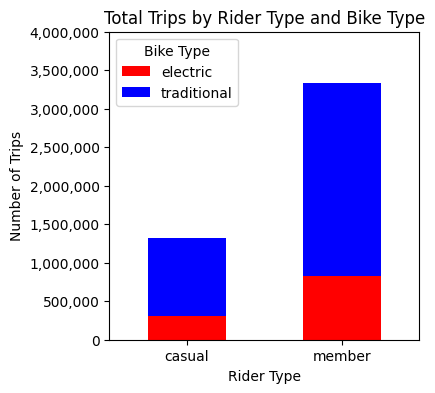

In [89]:
# Group by rider_type and bike_type and count the number of trips
rider_type_analysis = df.groupby(['rider_type', 'bike_type']).size().unstack()

# Plot stacked bar chart with specific colors
ax = rider_type_analysis.plot(kind='bar', stacked=True, color=['red', 'blue'], figsize=(4, 4))

# Customize plot labels, title and legend
ax.set_title("Total Trips by Rider Type and Bike Type")
ax.set_ylabel("Number of Trips")
ax.set_xlabel("Rider Type")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.legend(title="Bike Type")

# Set y-ticks in multiples of 500,000
ax.set_yticks(range(0, int(rider_type_analysis.sum().max()) + 500_000, 500_000))

# Ensure y-axis labels are not in scientific notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()

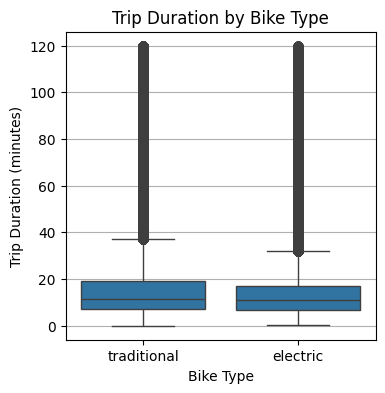

In [90]:
# BOXPLOT FOR TRIP DURATION BY BIKE TYPE

plt.figure(figsize=(4, 4))
sns.boxplot(x='bike_type', y='trip_duration_minutes', data=df)
plt.title("Trip Duration by Bike Type")
plt.ylabel("Trip Duration (minutes)")
plt.xlabel("Bike Type")
plt.grid(axis='y')
# Show the plot

plt.show()

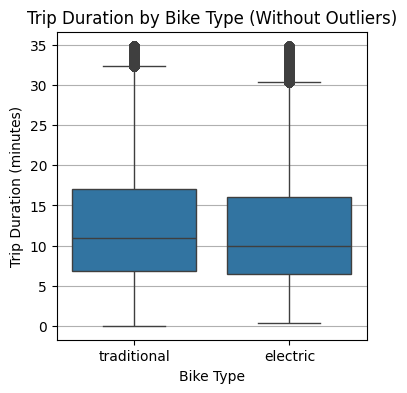

In [91]:
# BOXPLOT FOR TRIP DURATION BY BIKE TYPE WITHOUT OUTLIERS

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['trip_duration_minutes'].quantile(0.25)
Q3 = df['trip_duration_minutes'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataframe to exclude outliers
filtered_df = df[(df['trip_duration_minutes'] >= lower_bound) & (df['trip_duration_minutes'] <= upper_bound)]

# Boxplot for Trip Duration by Bike Type without outliers
plt.figure(figsize=(4, 4))
sns.boxplot(x='bike_type', y='trip_duration_minutes', data=filtered_df)
plt.title("Trip Duration by Bike Type (Without Outliers)")
plt.xlabel("Bike Type")
plt.ylabel("Trip Duration (minutes)")
plt.grid(axis='y')
plt.show()

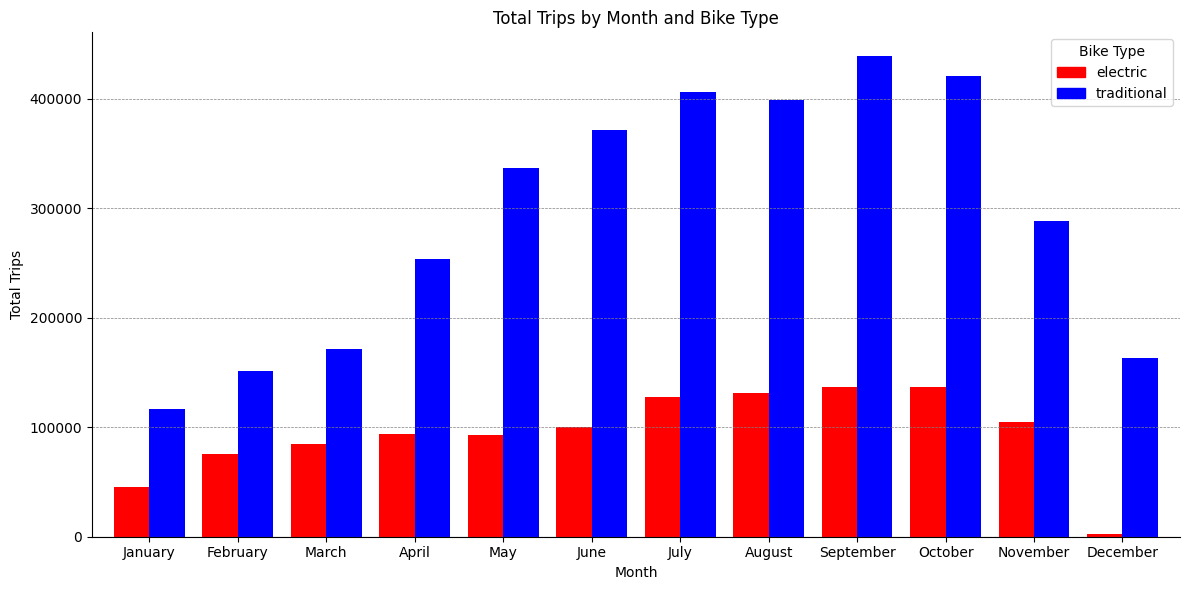

In [92]:
# Define month order
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

# Count total trips by month and bike type
monthly_trip_counts = df.groupby(["month_of_year", "bike_type"]).size().\
                        unstack(fill_value=0).reindex(month_order, fill_value=0)

# Plotting side-by-side bar chart
plt.figure(figsize=(12, 6))
monthly_trip_counts.plot(kind='bar', color=['red', 'blue'], width=0.8, ax=plt.gca())

# Customize plot labels and title
plt.title("Total Trips by Month and Bike Type")
plt.xlabel("Month")
plt.ylabel("Total Trips")
plt.xticks(rotation=0)

# Add a horizontal line at y=0 for better visibility
plt.axhline(0, color='gray', linewidth=0.8)

# Add grid lines
plt.grid(axis='y', linestyle='--', color='gray', linewidth=0.5)

# Custom legend with markers
traditional_patch = mpatches.Patch(color='blue', label='traditional')
electric_patch = mpatches.Patch(color='red', label='electric')
plt.legend(handles=[electric_patch, traditional_patch], title="Bike Type")

# Remove plot boundaries at right, left, and top
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Tight layout for better spacing
plt.tight_layout()
plt.show()

In [93]:
# Descriptive statistics for trip duration, grouped by bike type
df.groupby('bike_type')['trip_duration_minutes'].describe()

,count,mean,std,min,25%,50%,75%,max
bike_type,,,,,,,,
electric,1134129.0,13.950301,12.226582,0.366667,6.916667,11.000000,17.0,120.0
traditional,3520157.0,15.138243,13.284878,0.000000,7.000000,11.266667,19.0,120.0


In [94]:
# Descriptive statistics for trip duration, grouped by rider type
df.groupby('rider_type')['trip_duration_minutes'].describe()

,count,mean,std,min,25%,50%,75%,max
rider_type,,,,,,,,
casual,1321600.0,21.009505,17.840555,0.35,9.766667,16.0,26.0,120.0
member,3332686.0,12.405691,9.508569,0.00,6.000000,10.0,16.0,120.0


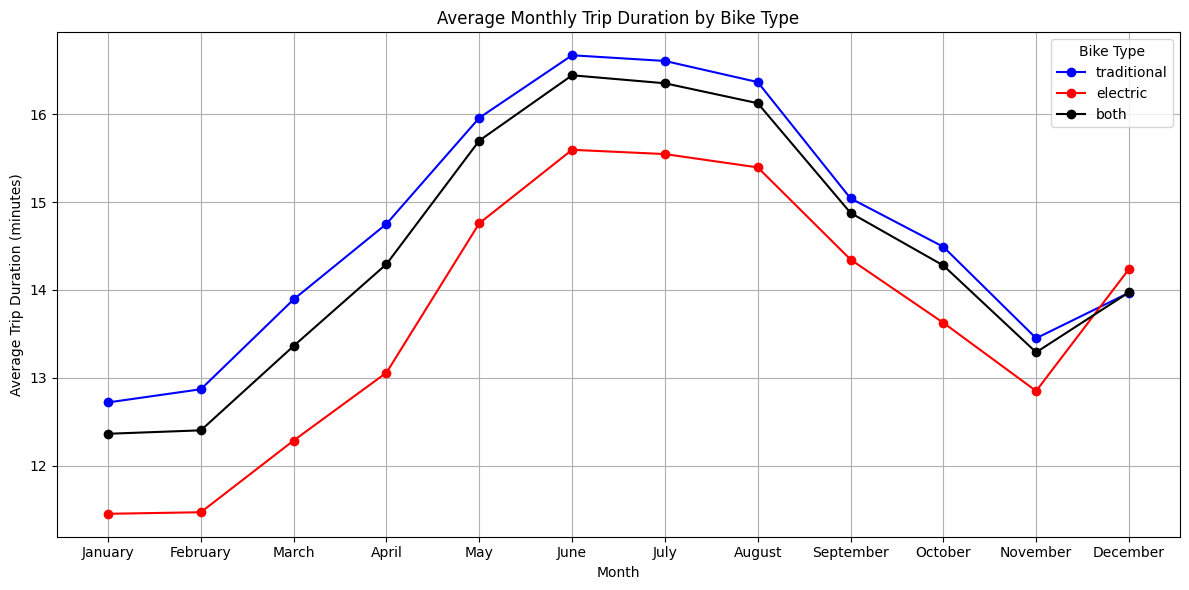

In [95]:
# Calculate avg trip duration by bike type/month
average_duration = df.groupby(['month_of_year', 'bike_type'])['trip_duration_minutes'].mean().unstack()

# Rename columns
average_duration.columns = ['electric', 'traditional']

# Reindex DataFrame
average_duration = average_duration.reindex(month_order)

# Calculate total average duration (mean of electric and traditional)
average_duration['total'] = df.groupby('month_of_year')['trip_duration_minutes'].mean()

# Plot avg trip duration
plt.figure(figsize=(12, 6))
plt.plot(average_duration.index, average_duration['traditional'], marker='o', label='traditional', color='blue')
plt.plot(average_duration.index, average_duration['electric'], marker='o', label='electric', color='red')
plt.plot(average_duration.index, average_duration['total'], marker='o', label='both', color='black')

plt.title('Average Monthly Trip Duration by Bike Type')
plt.xlabel('Month')
plt.ylabel('Average Trip Duration (minutes)')

plt.xticks(rotation=0)

plt.grid(True)
plt.legend(title='Bike Type')
plt.tight_layout()
plt.show()

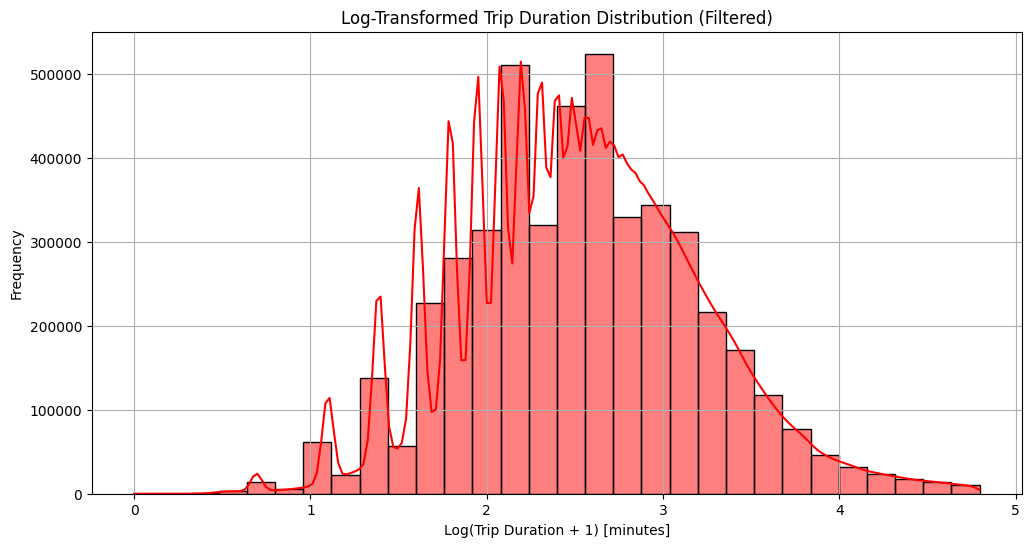

In [96]:
# Trip Duration Distribution (Histogram with Log Transformation)
plt.figure(figsize=(12, 6))
sns.histplot(np.log(df['trip_duration_minutes'] + 1), bins=30, color='red', kde=True)

plt.title('Log-Transformed Trip Duration Distribution (Filtered)')
plt.xlabel('Log(Trip Duration + 1) [minutes]')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

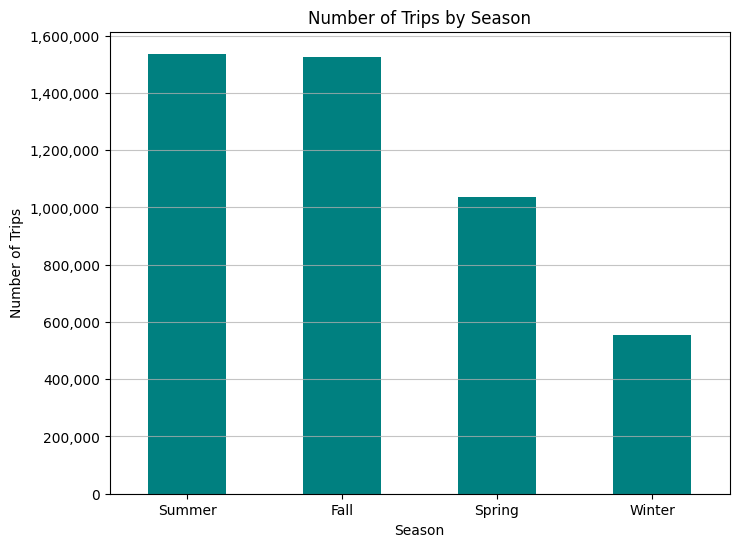

In [97]:
# Trips by Season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['started_at'].dt.month.apply(get_season)

plt.figure(figsize=(8, 6))
seasonal_trips = df['season'].value_counts()
seasonal_trips.plot(kind='bar', color='teal')
plt.title('Number of Trips by Season')
plt.xlabel('Season')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.grid(axis='y', alpha=0.75)
plt.show()

In [98]:
# How many trips started at station with ID "D32032"
df[df['start_station_id'] == 'D32032'].shape[0]

19656

In [99]:
df[df['start_station_id'] == 'A32024'].head()

,ride_id,bike_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,rider_type,hour_of_day,day_of_week,day_of_week_encoded,month_of_year,month_of_year_encoded,is_weekend,trip_duration_minutes,trip_distance_km,season
3733208,36D8C4E22415FA33,traditional,2024-10-02 15:22:00,2024-10-02 15:50:00,Staniford St at Merrimac St,A32024,Park Plaza at Charles St S.,D32042,42.36358,-71.063721,...,casual,15,Wednesday,2,October,10,0,28.0,0,Fall
3733236,08A572E2C8BCFCB6,traditional,2024-10-02 15:23:00,2024-10-02 15:32:00,Staniford St at Merrimac St,A32024,Washington St at Temple Pl,D32030,42.36358,-71.063721,...,member,15,Wednesday,2,October,10,0,9.0,0,Fall
3733242,CE8133A1B49ADC93,traditional,2024-10-02 15:23:00,2024-10-02 15:50:00,Staniford St at Merrimac St,A32024,Park Plaza at Charles St S.,D32042,42.36358,-71.063721,...,casual,15,Wednesday,2,October,10,0,27.0,0,Fall
3733879,A852A9301DEA9E39,traditional,2024-10-02 15:53:00,2024-10-02 16:25:00,Staniford St at Merrimac St,A32024,Landmark Center - Brookline Ave at Park Dr,B32015,42.36358,-71.063721,...,casual,15,Wednesday,2,October,10,0,32.0,0,Fall
3734839,98AD7C2658852555,traditional,2024-10-02 16:29:00,2024-10-02 16:55:00,Staniford St at Merrimac St,A32024,Boylston St at Jersey St,B32034,42.36358,-71.063721,...,casual,16,Wednesday,2,October,10,0,26.0,0,Fall


In [100]:
# Count trips starting at each station (checkouts)
checkouts = df.groupby('start_station_id').size().reset_index(name='bikes_checked_out')

# Count trips ending at each station (returns)
returns = df.groupby('end_station_id').size().reset_index(name='bikes_returned')

# Merge the two counts on station ID
station_usage = pd.merge(checkouts, returns, left_on='start_station_id', right_on='end_station_id', how='outer').fillna(0)

# Rename the columns for clarity
station_usage.rename(columns={'start_station_id': 'station_id'}, inplace=True)

# Calculate the difference (checkouts - returns)
station_usage['usage_difference'] = station_usage['bikes_checked_out'] - station_usage['bikes_returned']

# Calculate imbalance severity
station_usage['imbalance'] = abs(station_usage['usage_difference'])

# Identify stations with more checkouts, more returns, and balanced usage
more_checkouts = station_usage[station_usage['usage_difference'] > 0]
more_returns = station_usage[station_usage['usage_difference'] < 0]
balanced_usage = station_usage[station_usage['usage_difference'] == 0]

# Thresholds for "jammed" and "empty" stations
jammed_stations = station_usage[station_usage['usage_difference'] < -10]  # More returns
empty_stations = station_usage[station_usage['usage_difference'] > 10]    # More checkouts

# Display top jammed and empty stations based on imbalance severity
top_jammed = jammed_stations.sort_values(by='imbalance', ascending=False).head(10)
top_empty = empty_stations.sort_values(by='imbalance', ascending=False).head(10)

# Results for total stations with more checkouts, more returns, and balanced usage
print(f"Total stations with more checkouts: {len(more_checkouts)}")
print(f"Total stations with more returns: {len(more_returns)}")
print(f"Total stations with balanced usage: {len(balanced_usage)}")

Total stations with more checkouts: 221
Total stations with more returns: 300
Total stations with balanced usage: 3


In [101]:
# Top jammed stations
print("\nTop 10 jammed stations (more bikes returned than checked out):\n")
top_jammed


Top 10 jammed stations (more bikes returned than checked out):



,station_id,bikes_checked_out,end_station_id,bikes_returned,usage_difference,imbalance
355,M32037,44907,M32037,51263,-6356,6356
4,A32004,26616,A32004,28799,-2183,2183
210,D32007,23882,D32007,25823,-1941,1941
134,C32034,17604,C32034,19452,-1848,1848
337,M32018,60866,M32018,62639,-1773,1773
85,B32037,26284,B32037,28020,-1736,1736
90,B32058,17621,B32058,19206,-1585,1585
18,A32025,25554,A32025,27136,-1582,1582
33,A32042,16786,A32042,18367,-1581,1581
336,M32017,23051,M32017,24617,-1566,1566


In [102]:
# Top empty stations
print("Top 10 empty stations (more bikes checked out than returned):")
top_empty

Top 10 empty stations (more bikes checked out than returned):


,station_id,bikes_checked_out,end_station_id,bikes_returned,usage_difference,imbalance
360,M32042,50054,M32042,45716,4338,4338
80,B32032,25021,B32032,21346,3675,3675
389,M32071,26879,M32071,24083,2796,2796
345,M32026,19658,M32026,17069,2589,2589
253,D32054,5866,D32054,3526,2340,2340
381,M32063,26285,M32063,24320,1965,1965
434,S32001,6658,S32001,4723,1935,1935
84,B32036,13256,B32036,11372,1884,1884
95,B32063,15824,B32063,14002,1822,1822
359,M32041,49354,M32041,47562,1792,1792


In [103]:
# Check the number of trips for each bike type
e_bike_count = df[df['bike_type'] == 'electric'].shape[0]
traditional_bike_count = df[df['bike_type'] == 'traditional'].shape[0]

print(f"E-bike trips count: {e_bike_count}")
print(f"Traditional bike trips count: {traditional_bike_count}")

E-bike trips count: 1134129
Traditional bike trips count: 3520157


In [104]:
df.head()

,ride_id,bike_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,rider_type,hour_of_day,day_of_week,day_of_week_encoded,month_of_year,month_of_year_encoded,is_weekend,trip_duration_minutes,trip_distance_km,season
0,31F12D722DEC2205,traditional,2023-12-01 00:00:47,2023-12-01 00:18:32,MIT Carleton St at Amherst St,M32070,Lower Cambridgeport at Magazine St / Riverside Rd,M32022,42.360541,-71.086698,...,member,0,Friday,4,December,12,0,17.750000,0,Winter
1,C7B5105B0B65C0F3,traditional,2023-12-01 00:02:04,2023-12-01 00:07:54,MIT at Mass Ave / Amherst St,M32006,MIT Vassar St,M32042,42.358100,-71.093198,...,member,0,Friday,4,December,12,0,5.833333,0,Winter
2,68B5F2A512F98D31,traditional,2023-12-01 00:02:11,2023-12-01 00:03:15,South Station - 700 Atlantic Ave,A32010,Boston Landing,A32045,42.352175,-71.055547,...,member,0,Friday,4,December,12,0,1.066667,0,Winter
3,498C4A8C729ED986,traditional,2023-12-01 00:04:19,2023-12-01 00:14:00,One Beacon St,B32061,Columbus Ave at W. Canton St,C32077,42.358477,-71.061351,...,member,0,Friday,4,December,12,0,9.683333,0,Winter
4,2B9A06F84509E2C0,traditional,2023-12-01 00:04:38,2023-12-01 00:16:16,Silber Way,D32032,Dartmouth St at Newbury St,D32045,42.349495,-71.100575,...,member,0,Friday,4,December,12,0,11.633333,0,Winter
